In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import color
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
mpl.rcParams['axes.edgecolor'] = 'white' 
mpl.rcParams['axes.labelcolor'] = 'white' 
mpl.rcParams['xtick.color'] = 'white' 
mpl.rcParams['ytick.color'] = 'white' 
mpl.rcParams['text.color'] = 'white' 
mpl.rcParams['axes.facecolor'] = '#111111'
mpl.rcParams['figure.max_open_warning'] = 0

## Loading the images

The set can be changed by selecting a different folder

In [4]:
q0 = imageio.imread('8/19382486-Quadrant_I0.jpg')
q90 = imageio.imread('8/19382486-Quadrant_I90.jpg')
q45 = imageio.imread('8/19382486-Quadrant_I45.jpg')
q135 = imageio.imread('8/19382486-Quadrant_I135.jpg')

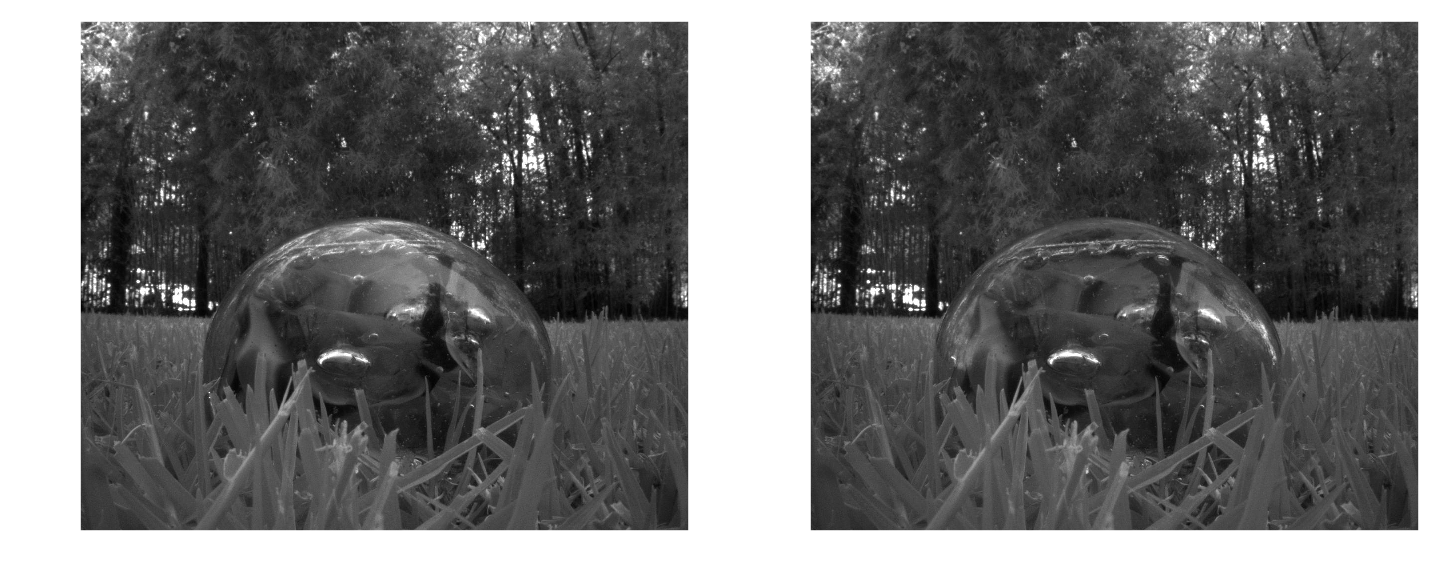

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(q0, cmap = 'gray')
ax[1].imshow(q90, cmap = 'gray')
fig.set_size_inches(12,6)

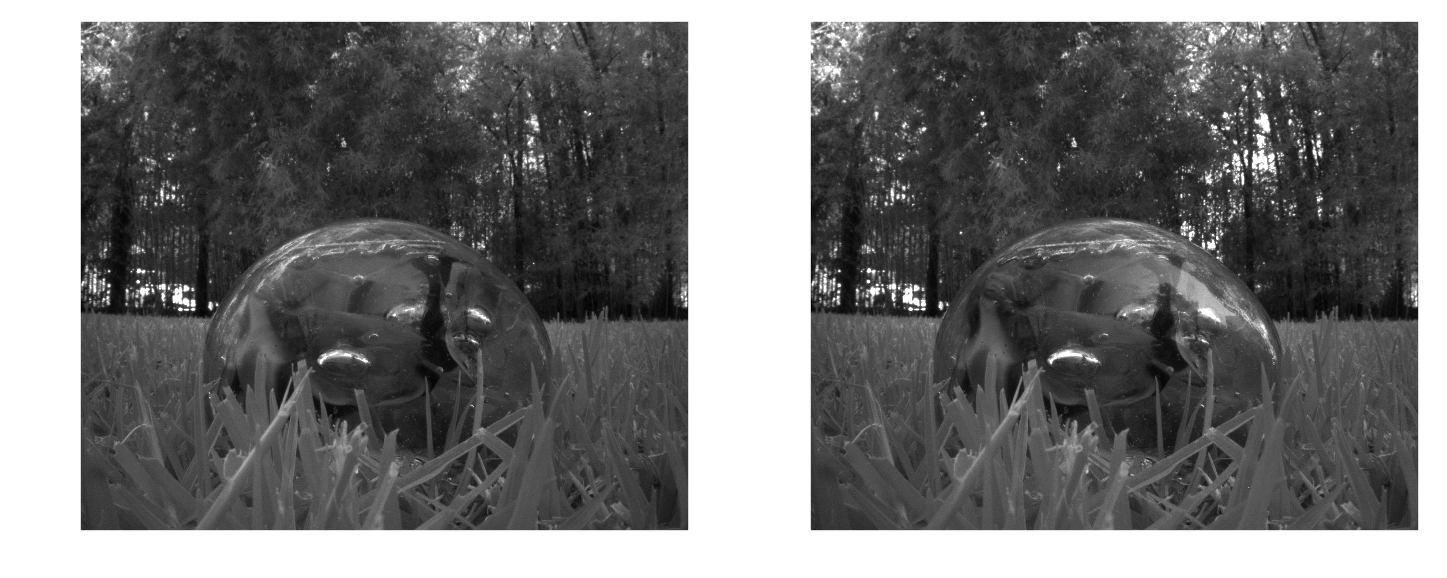

In [6]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(q45, cmap = 'gray')
ax[1].imshow(q135, cmap = 'gray')
fig.set_size_inches(12,6)

## Computing the Stoke's parameters

$$\text{S}_1 = I_0 - I_{90}$$

 $$\text{S}_2 = I_{45} - I_{135}$$

In [56]:
S0 = q0.astype('int8') + q90.astype('int8')
S1 = q0.astype('int8') - q90.astype('int8')

S2 = q45.astype('int8') - q135.astype('int8')

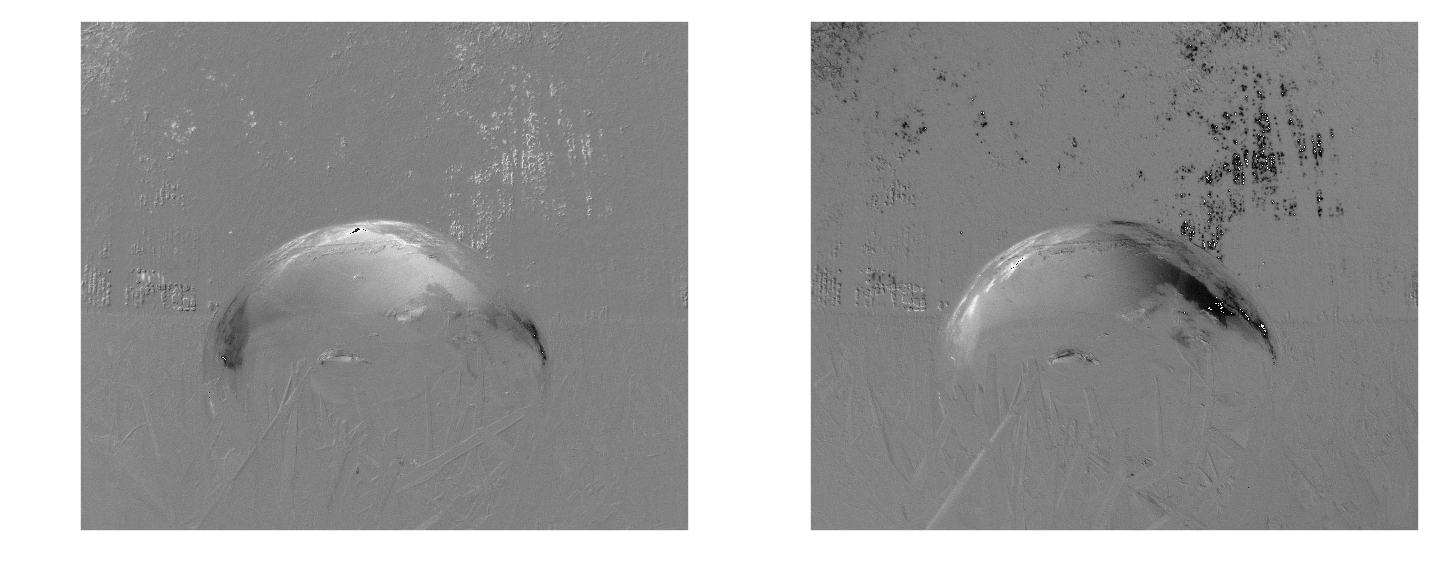

In [57]:
fig, ax = plt.subplots(1,2)
im = ax[0].imshow(S1, cmap = 'gray')
im2 = ax[1].imshow(S2, cmap = 'gray')
fig.set_size_inches(12,6)

## Compute the simple linear combination of signal and map them to color and luminance channels

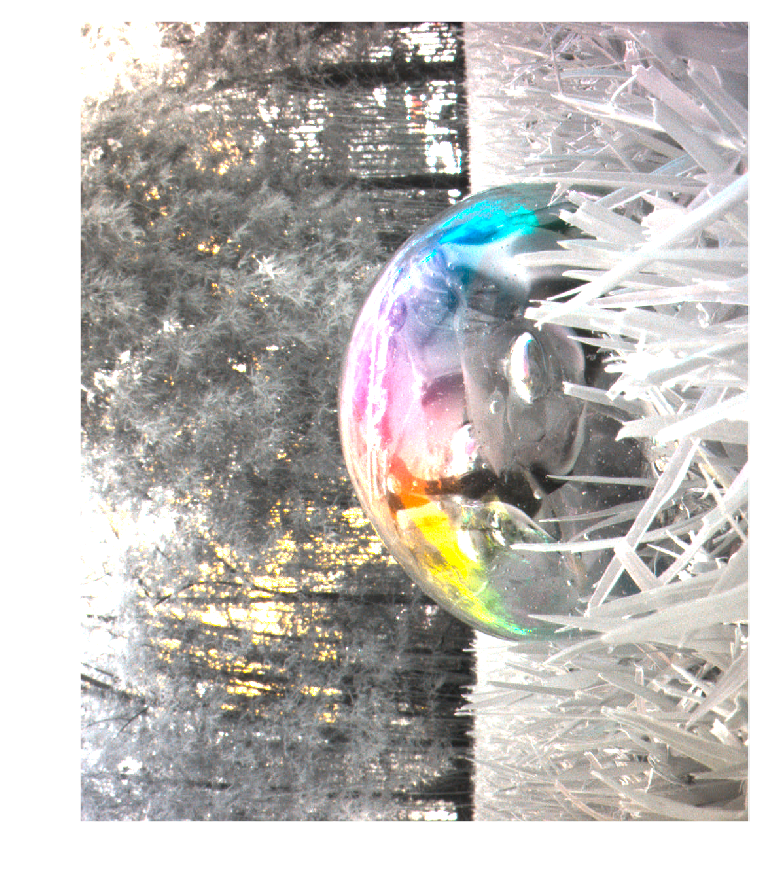

In [31]:
flab = np.array([(q0.astype(float)+q90.astype(float))/2,q0.astype(float)-q90.astype(float),q135.astype(float)-q45.astype(float)])
fig, ax = plt.subplots()
fig.set_size_inches(6,8)
ax.imshow(color.lab2rgb(flab.swapaxes(0,2)))
fig.savefig('esfera_simple.png')

## Trying more complex computations

In [16]:
surr = 3
start = surr
sy = q0.shape[0] - surr * 2
sx = q0.shape[1] - surr * 2
ret = np.zeros((sy,sx))
for i in range(sy):
    for j in range(sx):
        ret[i,j] = q0[i+start,j+start].astype(float) - np.mean(q90[i+start-surr:i+start+surr,j+start-surr:j+start+surr].astype(float))
        

In [17]:
surr = 3
start = surr
sy = q0.shape[0] - surr * 2
sx = q0.shape[1] - surr * 2
ret2 = np.zeros((sy,sx))
for i in range(sy):
    for j in range(sx):
        ret2[i,j] = q135[i+start,j+start].astype(float) - np.mean(q45[i+start-surr:i+start+surr,j+start-surr:j+start+surr].astype(float))

In [18]:
lab = np.array([(q0[surr:sy+surr,surr:sx+surr].astype(float)+q90[surr:sy+surr,surr:sx+surr].astype(float))/2, ret, ret2])
ims = color.lab2rgb(lab.swapaxes(0,2))
fig, ax = plt.subplots()
fig.set_size_inches(6,8)
ax.imshow(ims)
#fig.savefig('moto_surround.png')

In [223]:
slab = np.array([(q0.astype(float)+q90.astype(float)+q135.astype(float)+q45.astype(float))/4,(q0.astype(float)-q90.astype(float))/(q0.astype(float)+q90.astype(float)),(q135.astype(float)-q45.astype(float))/(q135.astype(float)+q45.astype(float))])

In [46]:
loglab = np.array([(q0.astype(float)+q90.astype(float))/2,np.log(q0.astype(float)/q90.astype(float)),np.log(q135.astype(float)/q45.astype(float))])

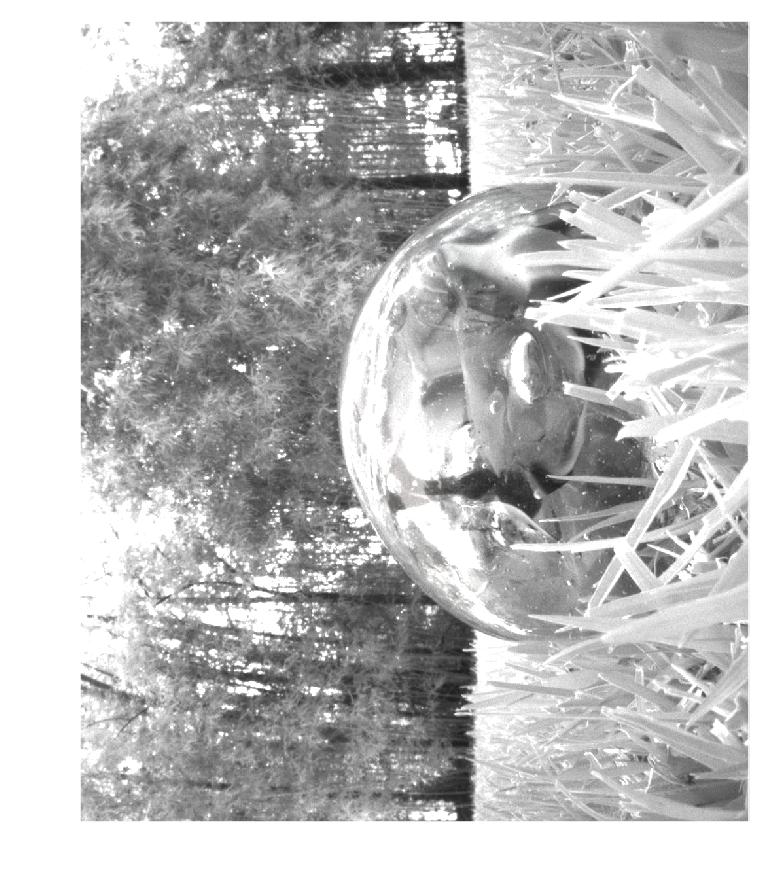

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(6,8)
ax.imshow(color.lab2rgb(loglab.swapaxes(0,2)))
#fig.savefig('moto_log.png')

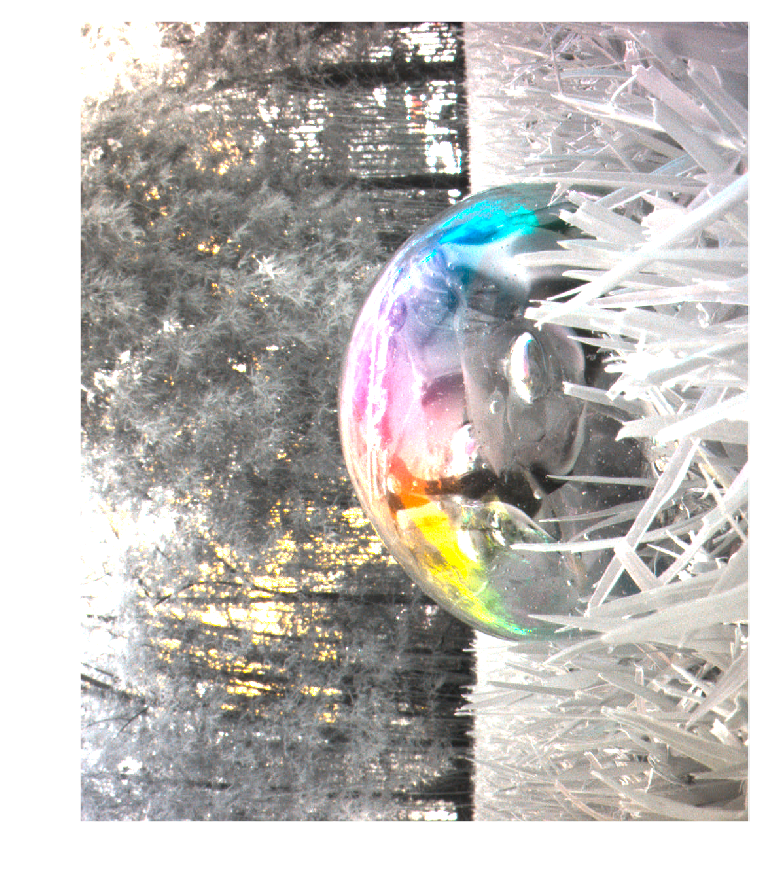

In [33]:
L = q0.astype(float) + q90.astype(float)
v = q0.astype(float) - (q45.astype(float) * .5 + q135 * .5)
h = q90.astype(float) - (q45.astype(float) * .5 + q135 * .5)
d = q135.astype(float) - (q0.astype(float) * .5 + q90 * .5)
a = q45.astype(float) - (q0.astype(float) * .5 + q90 * .5)
A = v - h
B = d - a
suplab = np.array([L/2,A,B])
fig, ax = plt.subplots()
fig.set_size_inches(6,8)
ax.imshow(color.lab2rgb(suplab.swapaxes(0,2)))
#fig.savefig('moto_supr.png')